## Importing Libraries

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
df =pd.read_csv('/content/drive/My Drive/datasets/fake_job_postings.csv')
df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


## EDA

In [122]:
df.dtypes

,0
job_id,int64
title,object
location,object
department,object
salary_range,object
company_profile,object
description,object
requirements,object
benefits,object
telecommuting,int64


Target variable - fraudulent <br>
Independent variables - job_id, title, location, department, salary_range, company_profile, description, requirements, benefits, telecommuting, has_company_logo, has_questions, employment_type, required_experience, required_education, industry, function               

In [123]:
# check the number of rows and columns of the dataset
df.shape

(17880, 18)

The dataset has 17880 rows and 18 columns.

### Statistics

In [124]:
# display the statistics of the numerical columns
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


From the above statistics we can gather that the columns 'telecommuting', 'has_company_logo',	'has_questions', 'fraudulent' are quantitative variables having 2 values - 0 and 1.

### Column values

In [125]:
# display the number of unique values each column has
unique_counts = df.nunique()
print(unique_counts)

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11967
benefits                6204
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64


In [126]:
# display the unique values each column has
columns = ['title', 'location', 'department', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience',
           'required_education', 'industry', 'function']

for column in columns:
    print(f"{column}")
    print(df[column].value_counts())
    print()

title
title
English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: count, Length: 11231, dtype: int64

location
location
GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
GB, SFK, Leiston 

In [127]:
# columns that have only 2 values - 0 and 1
binary_columns = ['telecommuting', 'has_company_logo', 'has_questions']

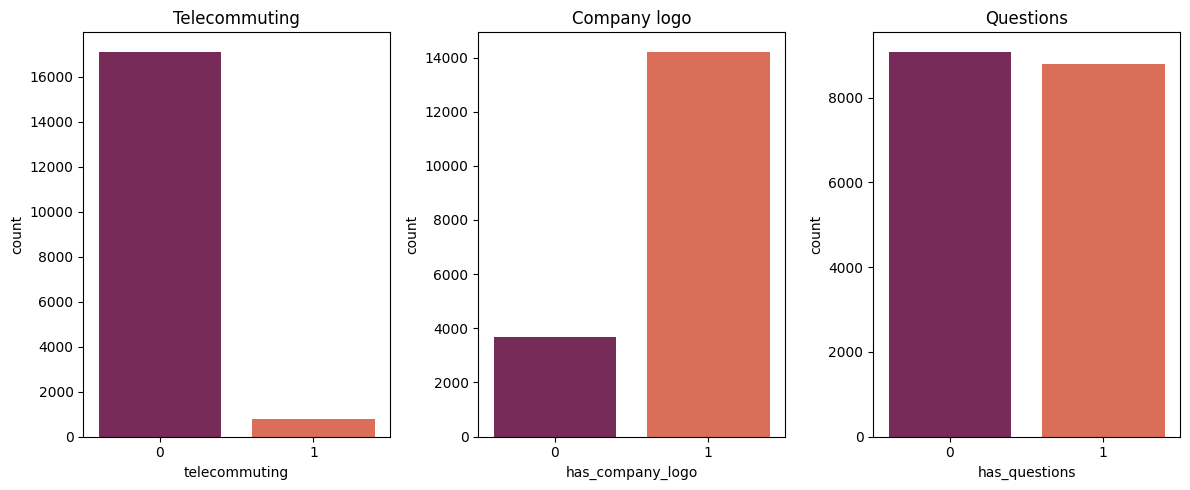

In [128]:
# plotting the countplots for the binary columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
sns.countplot(x='telecommuting', data=df, ax=axes[0], palette='rocket',hue='telecommuting', legend=False)
axes[0].set_title('Telecommuting')

sns.countplot(x='has_company_logo', data=df, ax=axes[1], palette='rocket', hue='has_company_logo', legend=False)
axes[1].set_title('Company logo')

sns.countplot(x='has_questions', data=df, ax=axes[2], palette='rocket', hue='has_questions', legend=False)
axes[2].set_title('Questions')

plt.tight_layout()
plt.show()

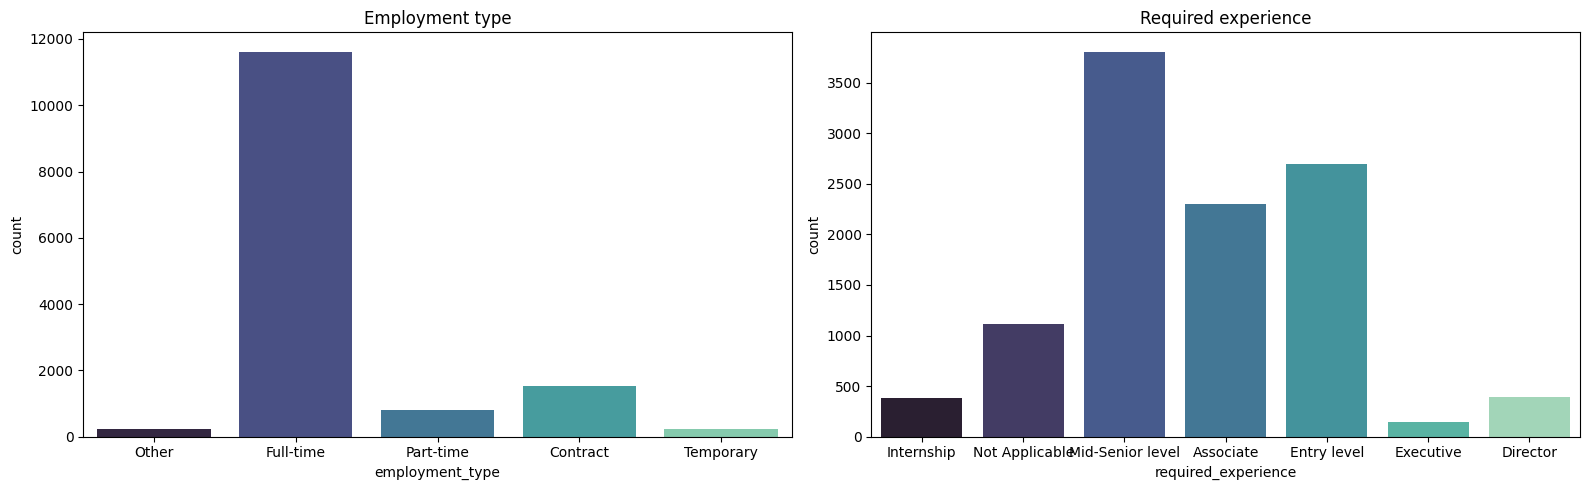

In [129]:
# plotting the countplots for the columns- employment_type and required_experience
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
sns.countplot(x='employment_type', data=df, ax=axes[0], palette='mako', hue='employment_type', legend=False)
axes[0].set_title('Employment type')

sns.countplot(x='required_experience', data=df, ax=axes[1], palette='mako', hue='required_experience', legend=False)
axes[1].set_title('Required experience')

plt.tight_layout()
plt.show()

Most job postings are for full-time jobs. <br>
We can also observe that many job postings do not specify any required experience. If specified, most jobs seem to require mid-senior level experience.

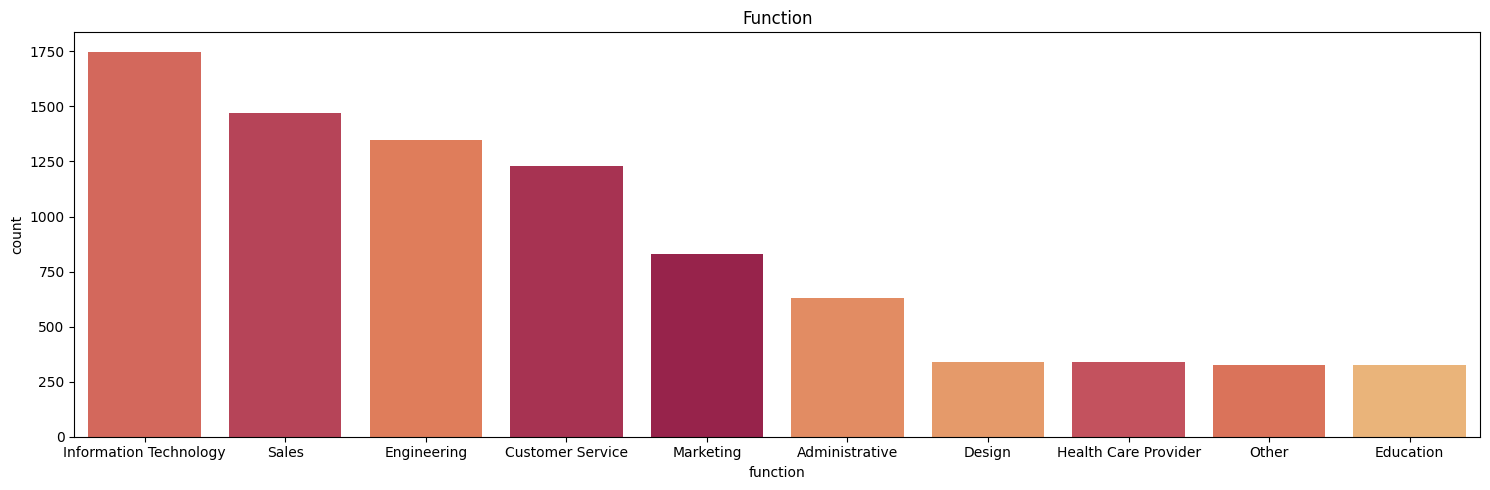

In [130]:
# plotting the countplots for the column- function
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.countplot(x = 'function', data = df, order = df['function'].value_counts()[:10].index, ax=axes, palette='Spectral', hue='function', legend=False)
axes.set_title('Function')

plt.tight_layout()
plt.show()

Ignoring the 'None' value, jobs in Information Technology, Sales, Engineering, Customer Service sectors are in high demand.

In [131]:
print(df['fraudulent'].value_counts())

fraudulent
0    17014
1      866
Name: count, dtype: int64


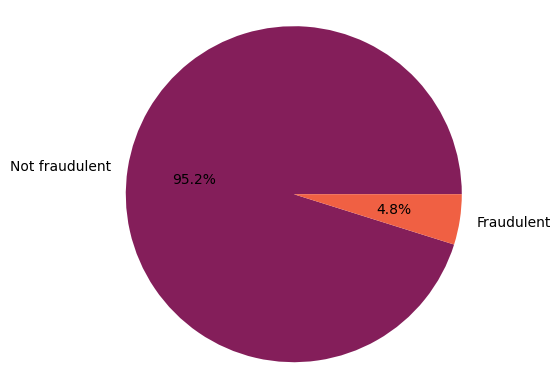

In [132]:
# visualizing the class imbalance using piechart
labels = ['Not fraudulent', 'Fraudulent']
colors = sns.color_palette('rocket', n_colors=len(labels))
sizes = [df['fraudulent'].value_counts()[0], df['fraudulent'].value_counts()[1]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.show()

The counts of the values 'Fraudulent'(1) and 'Not Fraudulent'(0) of the 'fraudulent' column show that there is an class imbalance in the dataset. Considering the nature of the problem, it is not surprising that there is more data for 'Not Fraudulent'. The pie chart above visualizes this imbalance.

### Duplicate values

In [133]:
# checking for duplicate records in the dataset
df.duplicated().sum()

0

In [134]:
# dropping the 'job_id' column as it is irrelevant to the task at hand
df.drop(columns=['job_id'],inplace=True)

We are dropping the column 'job_id' as it does not seem to be relevant for the prediction task.

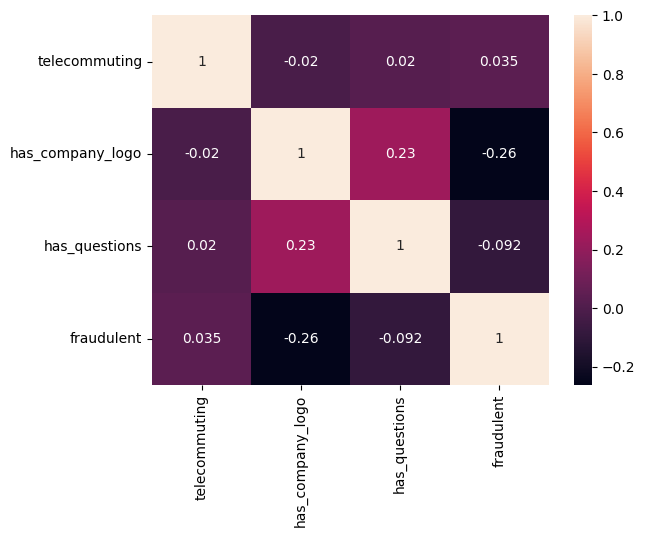

In [135]:
# displaying the correlation heatmap to check for multicollinear features
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True)
plt.show()

From the above heatmap we can observe that none of the columns showed in the heatmap are highly correlated.

In [136]:
df['location'].head(5)

,location
0,"US, NY, New York"
1,"NZ, , Auckland"
2,"US, IA, Wever"
3,"US, DC, Washington"
4,"US, FL, Fort Worth"


In [137]:
# creating a function to retrieve only the country from the 'location' column. This column originally contains the country and cities as well. The retrieved countries are then inserted into a ne3w column 'country'.
def split(location):
    if pd.notna(location):
        address = location.split(',')
        return address[0]
    else:
        return None

df['country'] = df['location'].apply(split)

In [138]:
# displaying unique values of the retrieved countries and their counts
df['country'].value_counts()

,count
country,
US,10656
GB,2384
GR,940
CA,457
DE,383
...,...
SI,1
PE,1
SD,1


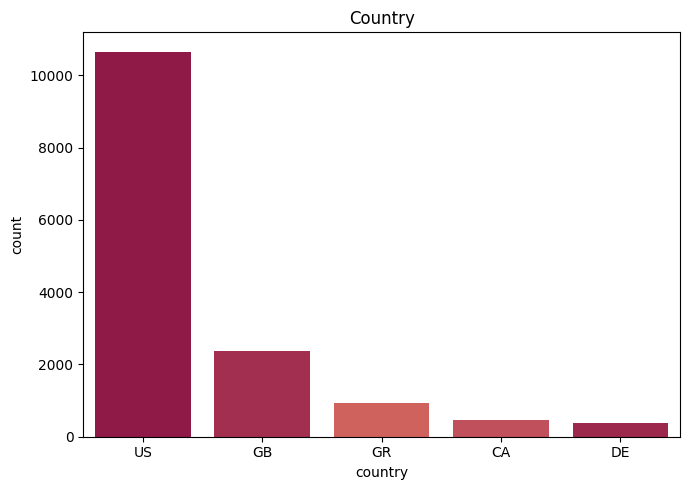

In [139]:
# plotting the countplot for the new column- country
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
sns.countplot(x = 'country', data = df, order = df['country'].value_counts()[:5].index, ax=axes, palette='Spectral', hue='country', legend=False)
axes.set_title('Country')

plt.tight_layout()
plt.show()

We can observe that most of the job posting data has US as its location.

In [140]:
# check number of unique countries
country_counts = df['country'].nunique()
print(country_counts)

90


### Null Values

In [141]:
# checking for NA values in the dataset
df.isna().sum()

,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0
has_company_logo,0


In [142]:
# these columns contain NA values.
cols_tofill=['title','location', 'department', 'salary_range', 'company_profile','description', 'requirements', 'benefits',
             'employment_type','required_experience','required_education','industry','function']

In [143]:
# Replacing the NA values with None
df[cols_tofill] = df[cols_tofill].fillna(value='None')

In [144]:
# After replacement, there are no NA values
df.isna().sum()

,0
title,0
location,0
department,0
salary_range,0
company_profile,0
description,0
requirements,0
benefits,0
telecommuting,0
has_company_logo,0


In [145]:
df.head(5)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,None,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,None,0,1,0,Other,Internship,None,None,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,None,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,None,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",None,None,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,None,0,1,0,None,None,None,None,None,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,None,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",None,None,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


### Fake vs Real jobs graphs

In [146]:
# Creating two new dataframes where the fakejobs dataframe contains only fradulent job posting records whereas the realjobs dataframe contains only real job posting records.
fakejobs = df[df['fraudulent']==1]
realjobs = df[df['fraudulent']==0]

Text(0.5, 0, 'Function')

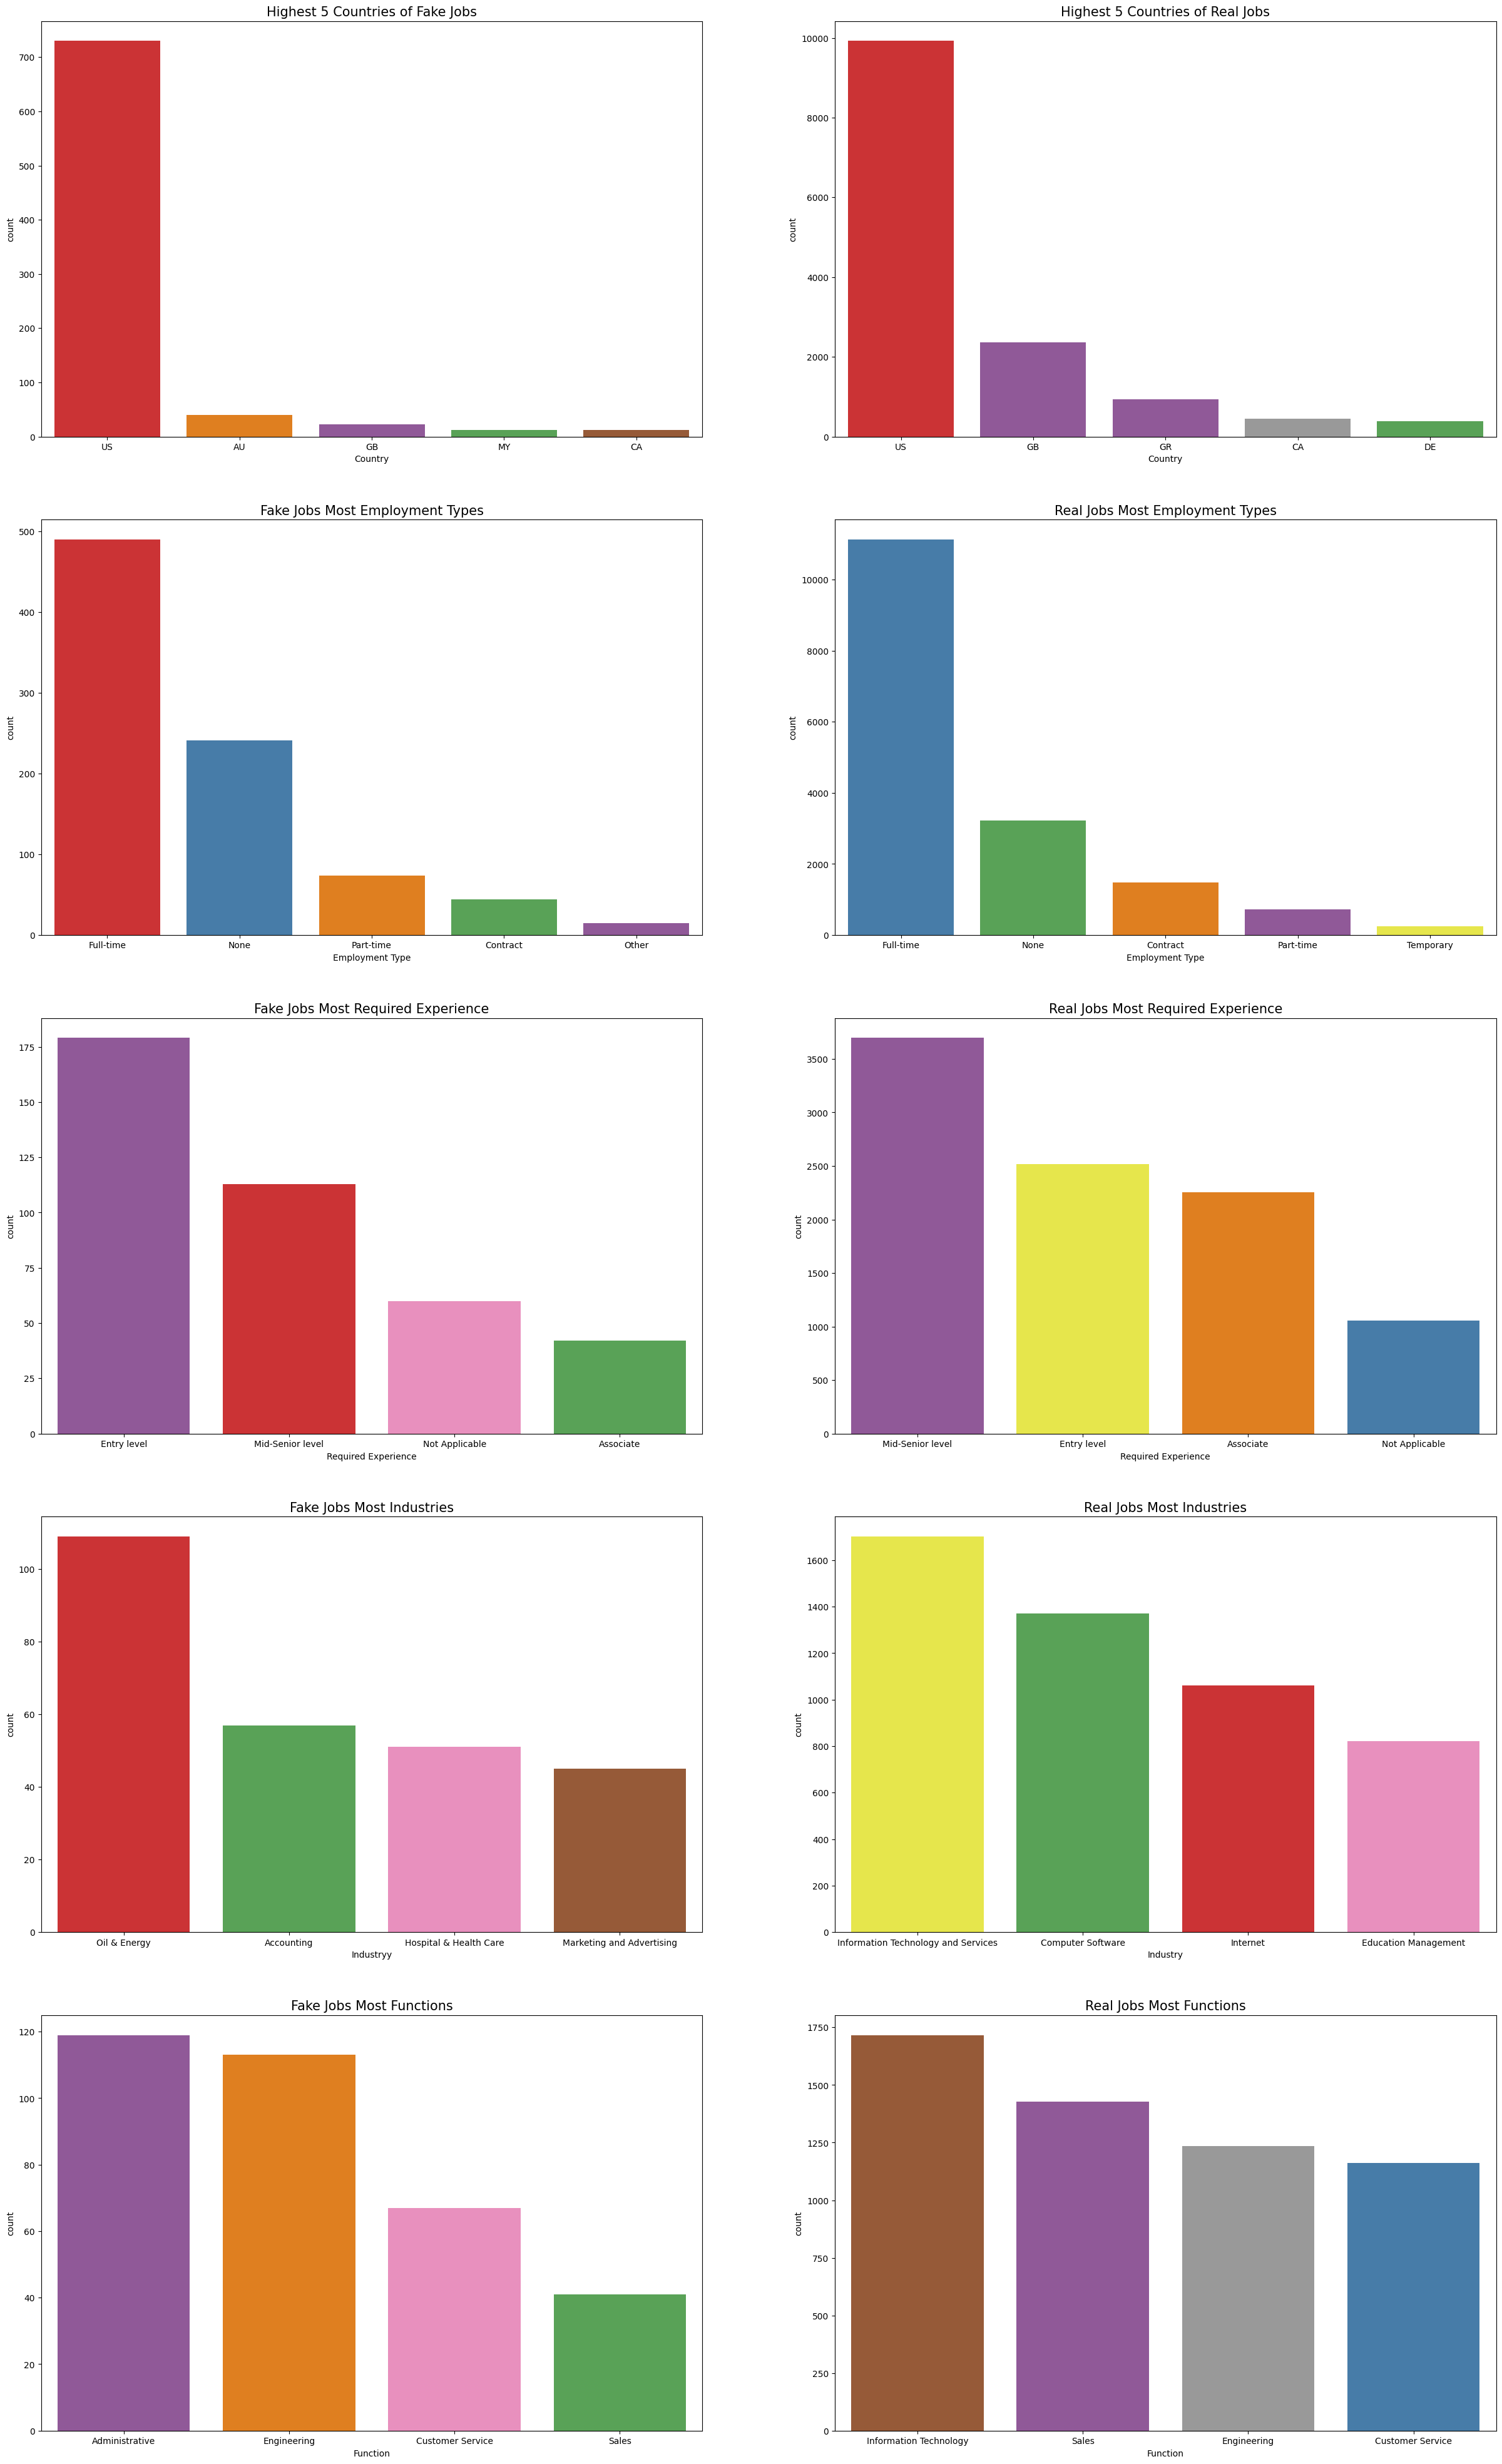

In [147]:
# plotting the countplots for columns- country, employment_type, required_experience, industry, and function for both the dataframes separately
fig,axes=plt.subplots(5,2,figsize=(30,50))
sns.countplot(x = 'country', data = fakejobs, palette='Set1',order = fakejobs['country'].value_counts()[:5].index, ax=axes[0,0], hue='country', legend=False)
sns.countplot(x = 'country', data = realjobs, palette='Set1',order = realjobs['country'].value_counts()[:5].index,ax=axes[0,1], hue='country', legend=False)
axes[0,0].set_title('Highest 5 Countries of Fake Jobs',fontsize=15)
axes[0,1].set_title('Highest 5 Countries of Real Jobs',fontsize=15)
axes[0,0].set_xlabel('Country')
axes[0,1].set_xlabel('Country')

sns.countplot(x = 'employment_type', data = fakejobs, palette='Set1',order = fakejobs['employment_type'].value_counts()[:5].index,ax=axes[1,0], hue='employment_type', legend=False)
sns.countplot(x = 'employment_type', data = realjobs, palette='Set1',order = realjobs['employment_type'].value_counts()[:5].index,ax=axes[1,1], hue='employment_type', legend=False)
axes[1,0].set_title('Fake Jobs Most Employment Types',fontsize=15)
axes[1,1].set_title('Real Jobs Most Employment Types',fontsize=15)
axes[1,0].set_xlabel('Employment Type')
axes[1,1].set_xlabel('Employment Type')

sns.countplot(x = 'required_experience', data = fakejobs, palette='Set1',order = fakejobs['required_experience'].value_counts()[1:5].index,ax=axes[2,0], hue='required_experience', legend=False)
sns.countplot(x = 'required_experience', data = realjobs, palette='Set1',order = realjobs['required_experience'].value_counts()[1:5].index,ax=axes[2,1], hue='required_experience', legend=False)
axes[2,0].set_title('Fake Jobs Most Required Experience',fontsize=15)
axes[2,1].set_title('Real Jobs Most Required Experience',fontsize=15)
axes[2,0].set_xlabel('Required Experience')
axes[2,1].set_xlabel('Required Experience')

sns.countplot(x = 'industry', data = fakejobs, palette='Set1',order = fakejobs['industry'].value_counts()[1:5].index,ax=axes[3,0], hue='industry', legend=False)
sns.countplot(x = 'industry', data = realjobs, palette='Set1',order = realjobs['industry'].value_counts()[1:5].index,ax=axes[3,1], hue='industry', legend=False)
axes[3,0].set_title('Fake Jobs Most Industries',fontsize=15)
axes[3,1].set_title('Real Jobs Most Industries',fontsize=15)
axes[3,0].set_xlabel('Industryy')
axes[3,1].set_xlabel('Industry')

sns.countplot(x = 'function', data = fakejobs, palette='Set1',order = fakejobs['function'].value_counts()[1:5].index,ax=axes[4,0], hue='function', legend=False)
sns.countplot(x = 'function', data = realjobs, palette='Set1',order = realjobs['function'].value_counts()[1:5].index,ax=axes[4,1], hue='function', legend=False)
axes[4,0].set_title('Fake Jobs Most Functions',fontsize=15)
axes[4,1].set_title('Real Jobs Most Functions',fontsize=15)
axes[4,0].set_xlabel('Function')
axes[4,1].set_xlabel('Function')

Maximum number of fake job postings seem to be from the Oil & energy industry.

In [148]:
'''# plotting histograms for the character count of 'description' for both dataframes
fig,axes=plt.subplots(1,2,figsize=(10,5))

df[df['fraudulent']==0]['description'].str.len().plot(bins=15, kind='hist', color='blue', label='Real', alpha=0.8, ax=axes[0])
df[df['fraudulent']==1]['description'].str.len().plot(bins=10, kind='hist', color='red', label='Fake', alpha=0.8, ax=axes[1])
fig.suptitle('Character count in Description of Job posting')
axes[0].set_xlabel("Character Count")
axes[0].set_ylabel("Frequency")
axes[0].legend()

axes[1].set_xlabel("Character Count")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()'''

'# plotting histograms for the character count of \'description\' for both dataframes\nfig,axes=plt.subplots(1,2,figsize=(10,5))\n\ndf[df[\'fraudulent\']==0][\'description\'].str.len().plot(bins=15, kind=\'hist\', color=\'blue\', label=\'Real\', alpha=0.8, ax=axes[0])\ndf[df[\'fraudulent\']==1][\'description\'].str.len().plot(bins=10, kind=\'hist\', color=\'red\', label=\'Fake\', alpha=0.8, ax=axes[1])\nfig.suptitle(\'Character count in Description of Job posting\')\naxes[0].set_xlabel("Character Count")\naxes[0].set_ylabel("Frequency")\naxes[0].legend()\n\naxes[1].set_xlabel("Character Count")\naxes[1].set_ylabel("Frequency")\naxes[1].legend()\n\nplt.tight_layout()\nplt.show()'

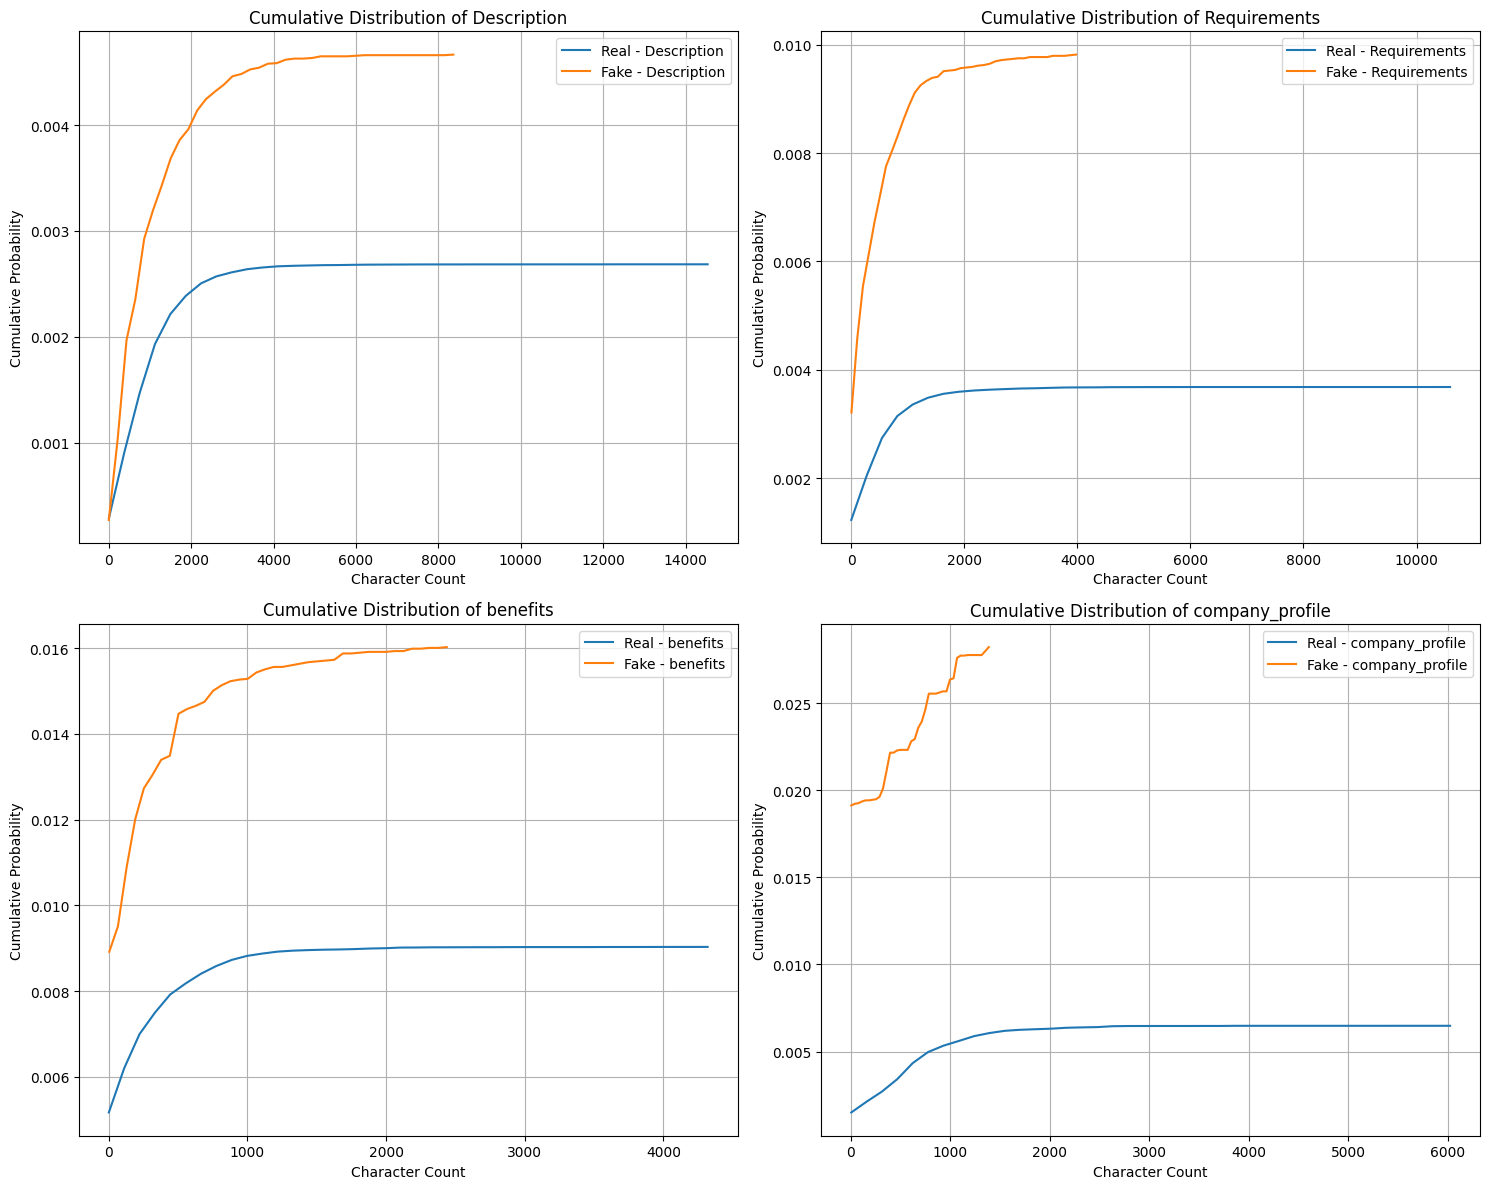

In [149]:
# character count
import numpy as np
import matplotlib.pyplot as plt

# Data columns to plot
data_columns = {
    'Description': 'description',
    'Requirements': 'requirements',
    'benefits': 'benefits',
    'company_profile': 'company_profile'
}

# Function to compute histograms and cumulative distributions
def compute_cdf(data):
    values, base = np.histogram(data, bins=40, density=True)
    cumulative = np.cumsum(values)
    return base[:-1], cumulative

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axs = axs.flatten()

for idx, (label, column) in enumerate(data_columns.items()):
    real_data = df[df['fraudulent'] == 0][column].str.len()
    fake_data = df[df['fraudulent'] == 1][column].str.len()

    real_base, real_cumulative = compute_cdf(real_data)
    fake_base, fake_cumulative = compute_cdf(fake_data)

    # Plotting on the respective subplot
    axs[idx].plot(real_base, real_cumulative, label=f'Real - {label}')
    axs[idx].plot(fake_base, fake_cumulative, label=f'Fake - {label}')
    axs[idx].legend()
    axs[idx].set_title(f'Cumulative Distribution of {label}')
    axs[idx].set_xlabel('Character Count')
    axs[idx].set_ylabel('Cumulative Probability')
    axs[idx].grid(True)

plt.tight_layout()
plt.show()

 For all columns, fake job postings tend to have longer text than real postings. This could be an attempt by the creators of fake postings to appear thorough or legitimate by providing excessive detail.

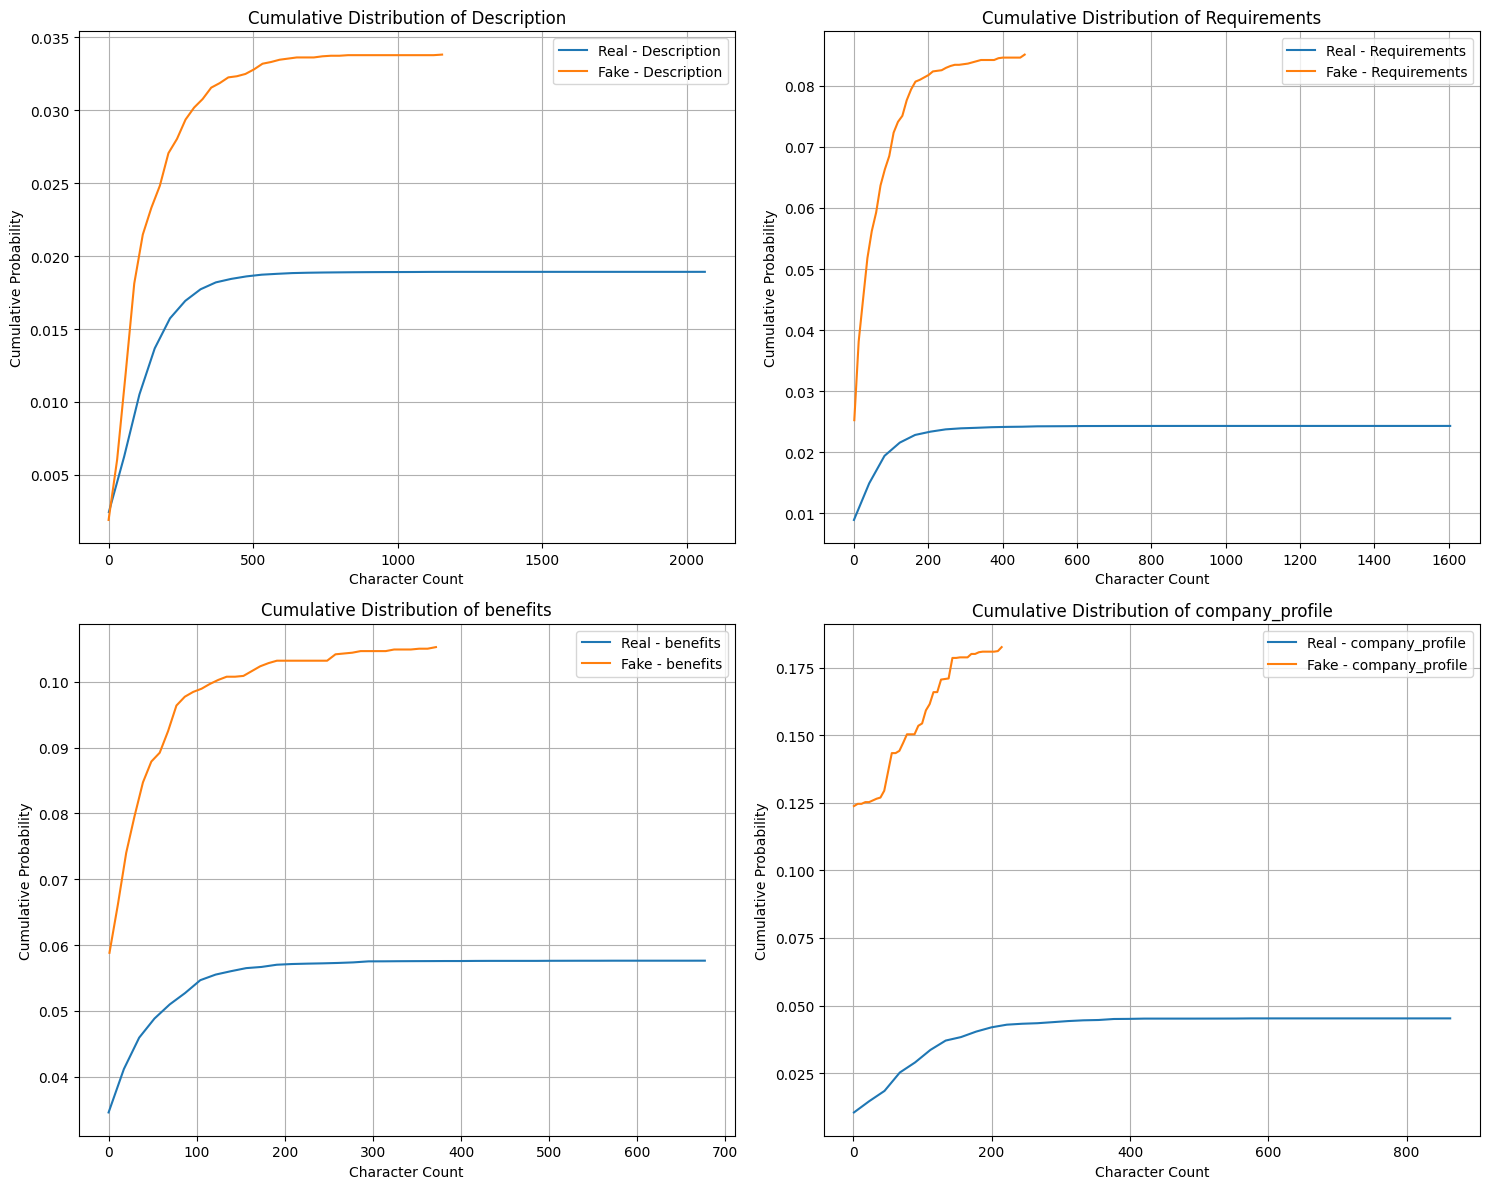

In [150]:
# word count
import numpy as np
import matplotlib.pyplot as plt

# Data columns to plot
data_columns = {
    'Description': 'description',
    'Requirements': 'requirements',
    'benefits': 'benefits',
    'company_profile': 'company_profile'
}

# Function to compute histograms and cumulative distributions
def compute_cdf(data):
    values, base = np.histogram(data, bins=40, density=True)
    cumulative = np.cumsum(values)
    return base[:-1], cumulative

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axs = axs.flatten()

for idx, (label, column) in enumerate(data_columns.items()):
    real_data = df[df['fraudulent'] == 0][column].apply(lambda x: len(str(x).split()))
    fake_data = df[df['fraudulent'] == 1][column].apply(lambda x: len(str(x).split()))

    real_base, real_cumulative = compute_cdf(real_data)
    fake_base, fake_cumulative = compute_cdf(fake_data)

    # Plotting on the respective subplot
    axs[idx].plot(real_base, real_cumulative, label=f'Real - {label}')
    axs[idx].plot(fake_base, fake_cumulative, label=f'Fake - {label}')
    axs[idx].legend()
    axs[idx].set_title(f'Cumulative Distribution of {label}')
    axs[idx].set_xlabel('Character Count')
    axs[idx].set_ylabel('Cumulative Probability')
    axs[idx].grid(True)

plt.tight_layout()
plt.show()

Again, for all columns, these graphs reinforce the pattern seen in the previous graphs: fake job postings tend to have longer text sections than real postings.

### Text Analysis

In [151]:
#df['text']=df['title']+' '+df['department']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']
df['text'] =  df['title'] + ' ' + df['country'] + ' ' + df['company_profile'] + ' ' +  df['description'] + ' ' + df['requirements'] + ' ' + \
              df['benefits'] + ' ' + df['required_experience'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function']

In [152]:
df['text'][0]

"Marketing Intern US We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and

Now that we have these huge combinations of words to handle, we should be handling it by considering the most repeated/common words in all the instances. However, common words like articles and verbs should be ignored as they don't contribute anything towards defining a particular job posting. One of the method to handle these kind of situations is using the Word Net Lemmatizer module. WordNetLemmatizer is used for reducing the words to base/root form when there is huge amount of data as we saw in this case.





In [153]:
text = df.text.to_list()

In [154]:
text[0]

"Marketing Intern US We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and

In [155]:
len(text)

17880

In [156]:
text = ' '.join(map(str,text))

In [157]:
len(text)

48016501

In [158]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

#### Tokenization

Tokenizing each word as an individual element of the list 'token_text'

In [159]:
token_text = word_tokenize(text)

In [160]:
token_text

['Marketing',
 'Intern',
 'US',
 'We',
 "'re",
 'Food52',
 ',',
 'and',
 'we',
 "'ve",
 'created',
 'a',
 'groundbreaking',
 'and',
 'award-winning',
 'cooking',
 'site',
 '.',
 'We',
 'support',
 ',',
 'connect',
 ',',
 'and',
 'celebrate',
 'home',
 'cooks',
 ',',
 'and',
 'give',
 'them',
 'everything',
 'they',
 'need',
 'in',
 'one',
 'place.We',
 'have',
 'a',
 'top',
 'editorial',
 ',',
 'business',
 ',',
 'and',
 'engineering',
 'team',
 '.',
 'We',
 "'re",
 'focused',
 'on',
 'using',
 'technology',
 'to',
 'find',
 'new',
 'and',
 'better',
 'ways',
 'to',
 'connect',
 'people',
 'around',
 'their',
 'specific',
 'food',
 'interests',
 ',',
 'and',
 'to',
 'offer',
 'them',
 'superb',
 ',',
 'highly',
 'curated',
 'information',
 'about',
 'food',
 'and',
 'cooking',
 '.',
 'We',
 'attract',
 'the',
 'most',
 'talented',
 'home',
 'cooks',
 'and',
 'contributors',
 'in',
 'the',
 'country',
 ';',
 'we',
 'also',
 'publish',
 'well-known',
 'professionals',
 'like',
 'Mario',


As there are both upper and lower cases letters in the 'token_text' variable, it would be difficult for the computer to consider them as having the same meaning. So for easy working with data, it would be a better idea if we convert all the words to lower case.

#### Lowercase values

In [161]:
lower_tokens = [t.lower() for t in token_text]

Now the algorithm considers all the words equally irrespective of the fact that the letters are upper/lower case as there are all lower case letters.

We have found the most common words in the data, and this is what we got as output

In [162]:
word_freq = Counter(lower_tokens)
print(Counter.most_common(word_freq, 10))

[(',', 364690), ('and', 358047), ('to', 204096), ('the', 197381), ('.', 173053), ('of', 151392), ('a', 141910), ('in', 124728), ('with', 90119), ('for', 83169)]


As we have seen, special characters such as commas and full stops were also counted here. Hence we have just considered alphabets.

In [163]:
text_only_alphabets = [t for t in lower_tokens if t.isalpha()]

There are some common words such as and, to, the, of etc. which doesn't contribute any information for prediction. So it should be removed. One way to remove these kinds of words is to use the stopwords dataset which comes under the nltk module. Below we have downloaded the dataset and then we have removed these words from the text_only_alphabets dataset.

In [164]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [165]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#### Stopword removal

In [166]:
english_stopped = stopwords.words('english')
no_stops = [t for t in text_only_alphabets if t not in english_stopped]

In [167]:
word_freq = Counter(no_stops)
print(Counter.most_common(word_freq, 10))

[('none', 38244), ('experience', 34779), ('work', 34704), ('team', 31548), ('us', 22175), ('business', 21359), ('company', 20950), ('customer', 18525), ('services', 17877), ('new', 17522)]


no_stops data frame has data without any stopping words now, which doesn't contribute any information to predict fake/real job. Now we might also encounter some words where 2 words are diferent, but would have same meaning. These kind of words should also be handled wisely by reducing the words to their root form. This can be done by WordNetLemmatizer() which is a part of Natural Language Processing(NLP). It takes the dataset as input and lemmatizes all the individual words to their root form. For better understanding how this module works, consider the two examples given below:


*   Word 'running' is lemmatized to 'run' as the meaning of word is same, but just the form how it is represented is different.

*   Word 'better' is lemmatized to 'good'. The reason being same, it has the similar meaning, but it's just that it has been reduced to its root form



#### Lemmatization

In [168]:
lemmatizer = WordNetLemmatizer()

lemmatized_words = [lemmatizer.lemmatize(t) for t in no_stops]
bow = Counter(lemmatized_words)
print(Counter.most_common(bow, 10))

[('none', 38244), ('experience', 36352), ('work', 36030), ('team', 35705), ('service', 32608), ('company', 27778), ('customer', 27653), ('business', 23646), ('u', 22193), ('client', 19632)]


In [169]:
lemmatized_words

['marketing',
 'intern',
 'u',
 'created',
 'groundbreaking',
 'cooking',
 'site',
 'support',
 'connect',
 'celebrate',
 'home',
 'cook',
 'give',
 'everything',
 'need',
 'one',
 'top',
 'editorial',
 'business',
 'engineering',
 'team',
 'focused',
 'using',
 'technology',
 'find',
 'new',
 'better',
 'way',
 'connect',
 'people',
 'around',
 'specific',
 'food',
 'interest',
 'offer',
 'superb',
 'highly',
 'curated',
 'information',
 'food',
 'cooking',
 'attract',
 'talented',
 'home',
 'cook',
 'contributor',
 'country',
 'also',
 'publish',
 'professional',
 'like',
 'mario',
 'batali',
 'gwyneth',
 'paltrow',
 'danny',
 'meyer',
 'partnership',
 'whole',
 'food',
 'market',
 'random',
 'named',
 'best',
 'food',
 'website',
 'james',
 'beard',
 'foundation',
 'iacp',
 'featured',
 'new',
 'york',
 'time',
 'npr',
 'pando',
 'daily',
 'techcrunch',
 'today',
 'located',
 'chelsea',
 'new',
 'york',
 'city',
 'james',
 'beard',
 'online',
 'food',
 'community',
 'curated',
 'rec

In [170]:
lemmatized_words_without_none = [word for word in lemmatized_words if word and word.lower() != 'none']

#### Wordcloud

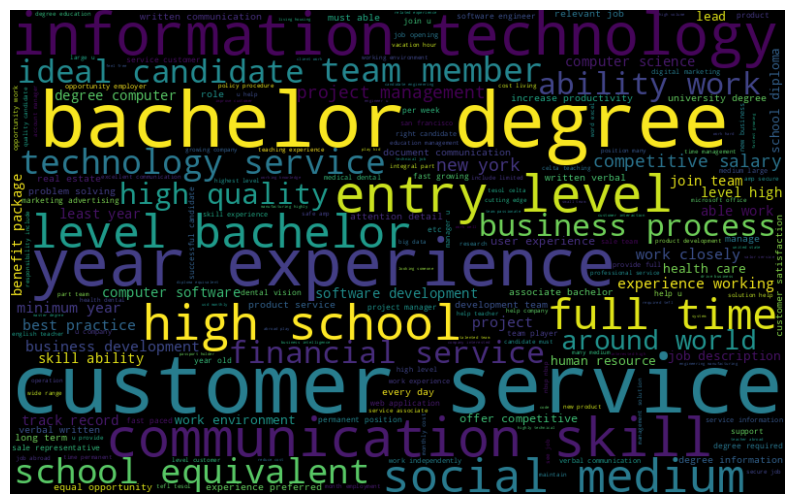

In [171]:
all_words = ' '.join(lemmatized_words_without_none)
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=120).generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

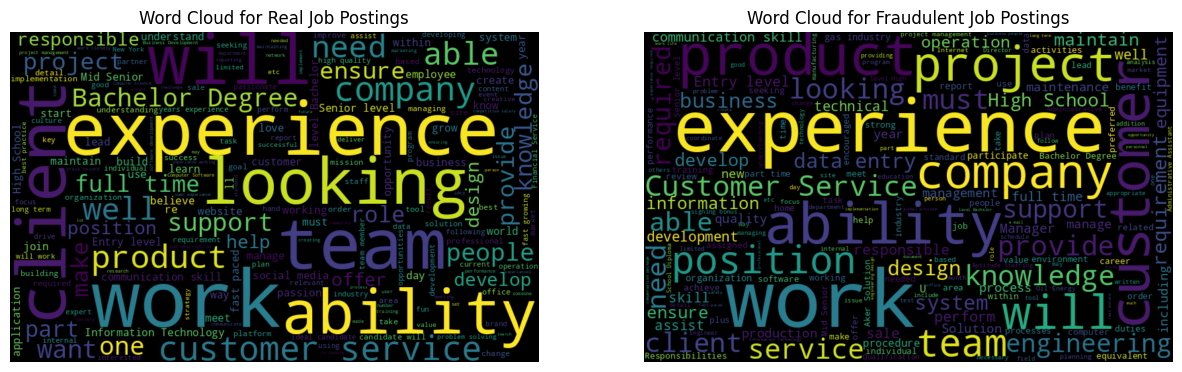

In [172]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains a column 'fraudulent' where 1 indicates fraudulent and 0 indicates real
# Also assuming 'text_column' is the name of the column containing the job descriptions

# Filter the DataFrame for real and fraudulent job postings
real_jobs = df[df['fraudulent'] == 0]['text']
fraudulent_jobs = df[df['fraudulent'] == 1]['text']

# Join all text for each category
all_real_words = ' '.join(str(job).replace('None', '') for job in real_jobs)
all_fraudulent_words = ' '.join(str(job).replace('None', '') for job in fraudulent_jobs)

# Create a word cloud for real job postings
wordcloud_real = WordCloud(width=800, height=500, random_state=21, max_font_size=120).generate(all_real_words)

# Create a word cloud for fraudulent job postings
wordcloud_fraud = WordCloud(width=800, height=500, random_state=21, max_font_size=120).generate(all_fraudulent_words)

# Display the word clouds
plt.figure(figsize=(15, 12))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud for Real Job Postings')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fraud, interpolation='bilinear')
plt.title('Word Cloud for Fraudulent Job Postings')
plt.axis('off')

plt.show()

### Creating new features

In [173]:
df['description_word_count'] = df['description'].apply(lambda x: len(str(x).split()))
df['description_char_count'] = df['description'].str.len()

df['requirements_word_count'] = df['requirements'].apply(lambda x: len(str(x).split()))
df['requirements_char_count'] = df['requirements'].str.len()

df['benefits_word_count'] = df['benefits'].apply(lambda x: len(str(x).split()))
df['benefits_char_count'] = df['benefits'].str.len()

df['company_profile_word_count'] = df['company_profile'].apply(lambda x: len(str(x).split()))
df['company_profile_char_count'] = df['company_profile'].str.len()

In [174]:
drop_columns = ['title','location','country','company_profile', 'description', 'requirements', 'benefits','required_experience', 'required_education', 'industry', 'function' ]
df = df.drop(columns =drop_columns)

In [175]:
df

,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,fraudulent,text,description_word_count,description_char_count,requirements_word_count,requirements_char_count,benefits_word_count,benefits_char_count,company_profile_word_count,company_profile_char_count
0,Marketing,None,0,1,0,Other,0,"Marketing Intern US We're Food52, and we've cr...",124,905,115,852,1,4,141,885
1,Success,None,0,1,0,Full-time,0,Customer Service - Cloud Video Production NZ 9...,315,2077,200,1433,227,1292,153,1286
2,None,None,0,1,0,None,0,Commissioning Machinery Assistant (CMA) US Val...,50,355,164,1363,1,4,141,879
3,Sales,None,0,1,0,Full-time,0,Account Executive - Washington DC US Our passi...,346,2600,176,1429,97,782,85,614
4,None,None,0,1,1,Full-time,0,Bill Review Manager US SpotSource Solutions LL...,168,1520,89,757,3,21,207,1628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Sales,None,0,1,1,Full-time,0,Account Director - Distribution CA Vend is lo...,226,1442,180,1273,161,857,290,1708
17876,Accounting,None,0,1,1,Full-time,0,Payroll Accountant US WebLinc is the e-commerc...,161,1216,111,721,54,511,330,2270
17877,None,None,0,0,0,Full-time,0,Project Cost Control Staff Engineer - Cost Con...,171,1291,159,1235,1,4,32,228
17878,None,None,0,0,1,Contract,0,Graphic Designer NG None Nemsia Studios is loo...,77,506,86,502,35,216,1,4


# **BALANCING THE DATA**

In [176]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

X = df.drop('fraudulent', axis=1)
y = df['fraudulent']

#resample the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# combining X and y to create the complete dataframe
resampled_data = pd.concat([pd.Series(y_resampled), pd.DataFrame(X_resampled)], axis=1)
resampled_data.columns = ['fraudulent'] + list(X.columns)

# Define a list of categorical columns
categorical_columns = [ 'department', 'salary_range', 'employment_type']
resampled_data = pd.get_dummies(resampled_data, columns=categorical_columns)

In [177]:
sample_size_resampled = resampled_data.shape[0]
print(f"The sample size after under-sampling is: {sample_size_resampled}")

The sample size after under-sampling is: 1732


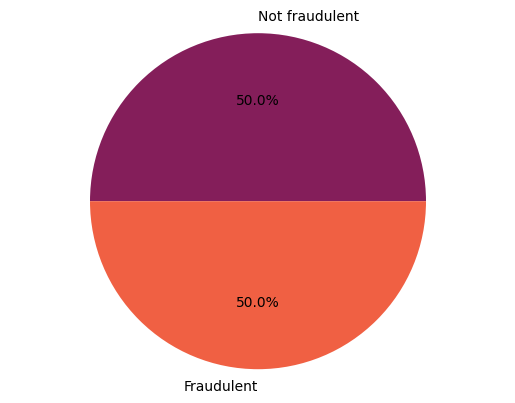

In [178]:
# visualizing the class imbalance using piechart
labels = ['Not fraudulent', 'Fraudulent']
colors = sns.color_palette('rocket', n_colors=len(labels))
sizes = [resampled_data['fraudulent'].value_counts()[0], resampled_data['fraudulent'].value_counts()[1]]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.show()

# **MODELING**

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_curve, auc

In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Feature vectorization

In [183]:
resampled_data['text'] = resampled_data['text'].fillna('')
resampled_data['text'] = resampled_data['text'].astype(str)

In [184]:
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(resampled_data['text']).toarray()  # Transform text to TF-IDF matrix
X_tfidf_df = pd.DataFrame(X_tfidf, columns=tfidf.get_feature_names_out(), index=resampled_data.index) # Convert TF-IDF matrix to DataFrame for better readability
X = pd.concat([resampled_data.drop(['text', 'fraudulent'], axis=1), X_tfidf_df], axis=1)

y = resampled_data['fraudulent']

print(X.head())
print(y.head())

       telecommuting  has_company_logo  has_questions  description_word_count  \
5230               0                 1              1                     175   
14112              0                 1              0                     405   
3168               0                 1              1                      77   
14804              0                 0              0                      34   
5809               0                 1              1                     289   

       description_char_count  requirements_word_count  \
5230                     1300                       77   
14112                    2566                       32   
3168                      526                       28   
14804                     239                      296   
5809                     1786                        1   

       requirements_char_count  benefits_word_count  benefits_char_count  \
5230                       554                   37                  304   
14112       

In [185]:
#train the data using train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [186]:
x_train

,telecommuting,has_company_logo,has_questions,description_word_count,description_char_count,requirements_word_count,requirements_char_count,benefits_word_count,benefits_char_count,company_profile_word_count,...,να,που,σε,στην,στο,τα,την,της,το,του
415,0,1,1,27,332,21,158,3,19,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17183,1,1,0,264,1746,299,2240,10,95,121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3608,0,1,0,88,566,38,249,41,304,106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7499,0,1,1,151,857,39,234,118,649,290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10161,0,1,0,191,1463,105,943,1,4,86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14298,0,1,0,151,1134,63,539,1,4,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5451,1,0,0,67,481,37,207,34,251,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8692,0,1,0,29,209,214,1652,1,4,49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8654,0,1,1,53,517,35,309,7,44,184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Navie Bayes

In [187]:
from sklearn.naive_bayes import MultinomialNB

In [188]:
from sklearn.metrics import roc_auc_score

In [189]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [190]:
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[:, 1]

In [191]:
# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.57      0.65       174
           1       0.65      0.81      0.72       173

    accuracy                           0.69       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.69      0.69       347

Confusion Matrix:
[[100  74]
 [ 33 140]]
ROC AUC Score: 0.7083416384293402


In [192]:
#Naive Bayes Model
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
#display results
print("Navie Bayes Model Evaluation")
print(classification_report(y_test, y_pred_nb))

Navie Bayes Model Evaluation
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       174
           1       0.85      0.92      0.88       173

    accuracy                           0.88       347
   macro avg       0.88      0.88      0.88       347
weighted avg       0.88      0.88      0.88       347



Confusion Matrix for Naive Bayes Model:
[[145  29]
 [ 14 159]]


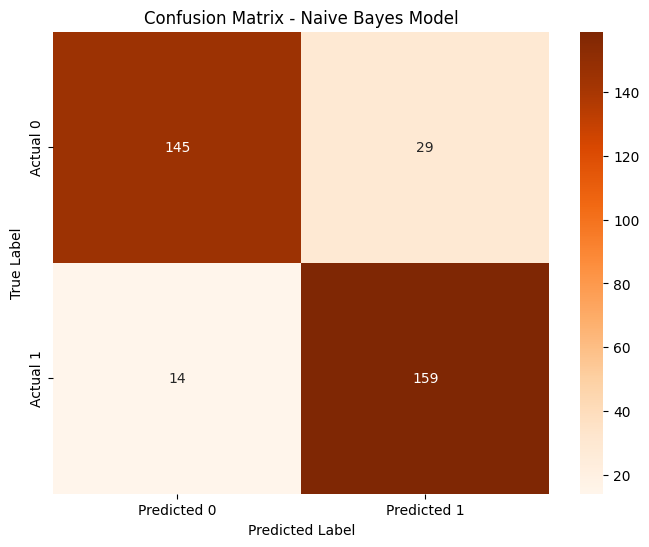

In [193]:
# Assuming y_test and y_pred are already defined
Cfm_nb = confusion_matrix(y_test, y_pred_nb)

# Display the confusion matrix
print("Confusion Matrix for Naive Bayes Model:")
print(Cfm_nb)

# If you want to visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Cfm_nb, annot=True, fmt="d", cmap="Oranges", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Naive Bayes Model")
plt.show()

0.876204238921002


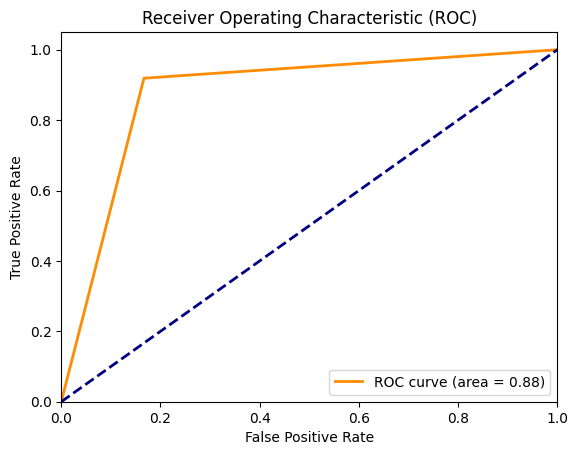

In [194]:
#calculating roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_nb)
roc_auc = auc(fpr, tpr)
print(roc_auc)
#display the plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### KNN

In [195]:
# Fit a KNN model on the training data
k = 2 # Set the number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
# Predict the target variable on the testing data
y_pred_knn = knn.predict(x_test)
print("KNN Model Evaluation")
print(classification_report(y_test, y_pred_knn))


KNN Model Evaluation
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       174
           1       0.75      0.67      0.71       173

    accuracy                           0.73       347
   macro avg       0.73      0.73      0.73       347
weighted avg       0.73      0.73      0.73       347



Confusion Matrix for KNN Model:
[[136  38]
 [ 57 116]]


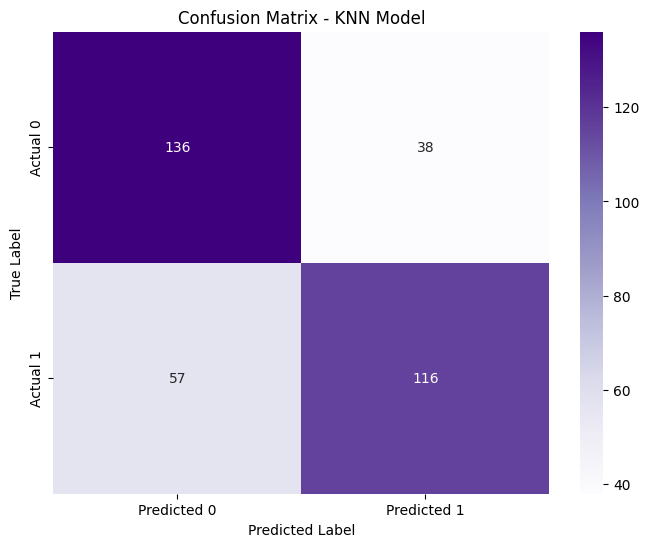

In [196]:
# Assuming y_test and y_pred are already defined
Cfm_knn = confusion_matrix(y_test, y_pred_knn)

# Display the confusion matrix
print("Confusion Matrix for KNN Model:")
print(Cfm_knn)

# If you want to visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Cfm_knn, annot=True, fmt="d", cmap="Purples", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - KNN Model")
plt.show()

ROC :  0.7260647133080858


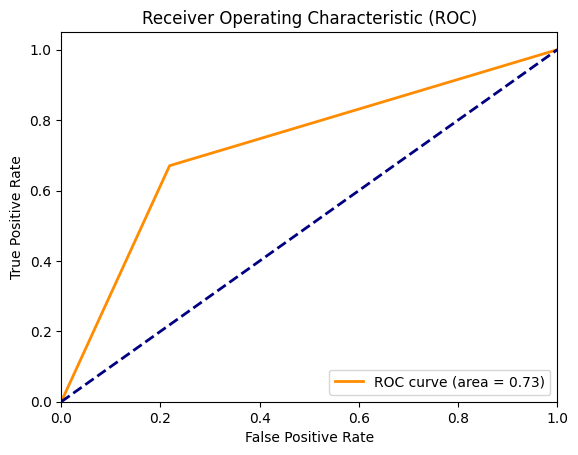

In [197]:
# Calculate the ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)
print("ROC : ", roc_auc)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)
print("Logistic Regression Model Evaluation")
print(classification_report(y_test, y_pred_log))

Logistic Regression Model Evaluation
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       174
           1       0.71      0.79      0.75       173

    accuracy                           0.73       347
   macro avg       0.74      0.74      0.73       347
weighted avg       0.74      0.73      0.73       347



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression Model:
[[118  56]
 [ 36 137]]


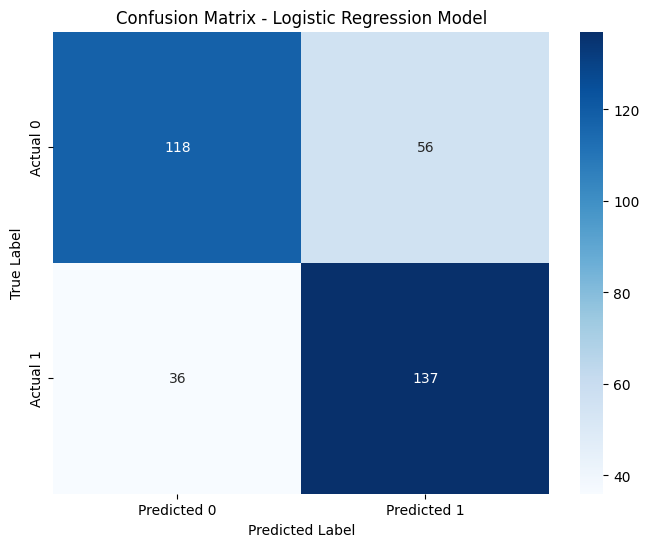

In [199]:
# Assuming y_test and y_pred_log are already defined
cm_log = confusion_matrix(y_test, y_pred_log)

# Display the confusion matrix
print("Confusion Matrix for Logistic Regression Model:")
print(cm_log)

# If you want to visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression Model")
plt.show()


0.7350342169955484


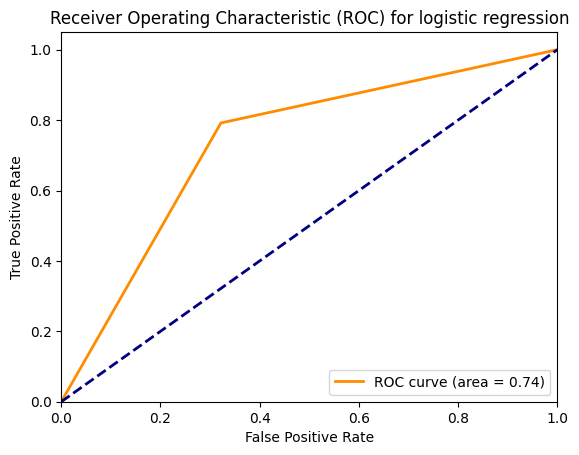

In [200]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for logistic regression')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [201]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)
print("Random Forest Model Evaluation")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Evaluation
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       174
           1       0.89      0.98      0.93       173

    accuracy                           0.93       347
   macro avg       0.93      0.93      0.93       347
weighted avg       0.93      0.93      0.93       347



Confusion Matrix for Random Forest Model:
[[154  20]
 [  4 169]]


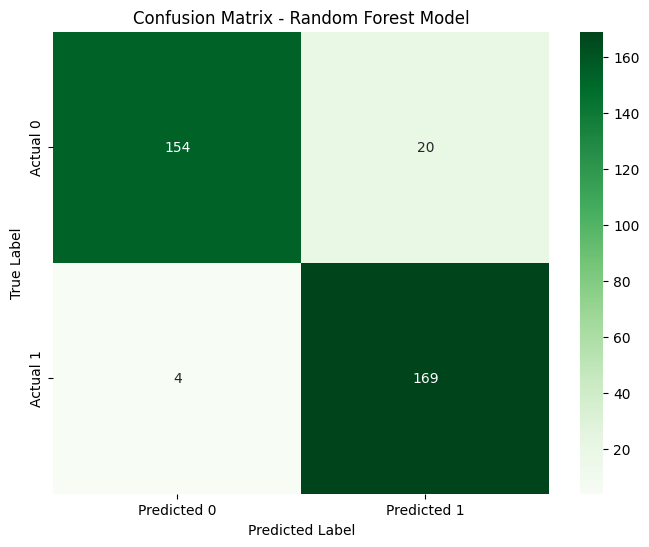

In [202]:
# Assuming y_test and y_pred_rf are already defined
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix
print("Confusion Matrix for Random Forest Model:")
print(cm_rf)

# If you want to visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()

0.9309680419905655


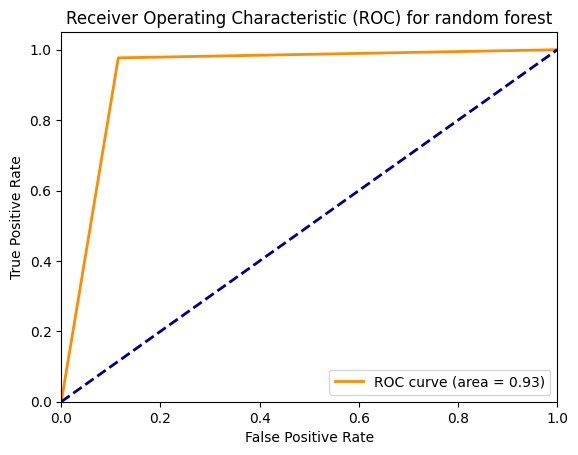

In [203]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for random forest')
plt.legend(loc="lower right")
plt.show()